In [1]:
import pandas as pd
import matplotlib
import sys
# print(sys.argv[1])
df = pd.read_csv('threads_ssd_more_data_2.csv') 
# print(df.groupby(['total_log_yes (in us)','num_log_yes']).mean().reset_index())

COMMIT_ALG             ONE_PC     TWO_PC
NUM_SERVER_THREADS                      
2                    816.8688   664.4670
4                   1539.4440  1293.1100
8                   2791.1920  2302.5260
12                  3956.3920  3357.4220
16                  4903.5620  4225.3400
20                  5648.9800  4848.8780
24                  6574.6540  5429.3220
28                  7020.0020  6154.1080
32                  6111.7660  5207.5680
36                  3708.7260  2837.0140
40                  1824.8220  1991.1340
44                  1544.8040  1433.4634


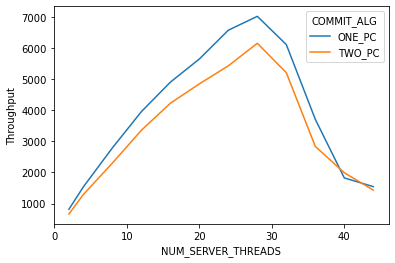

In [2]:
grouped = df.groupby(['COMMIT_ALG', 'NUM_SERVER_THREADS'])
newdf = grouped['Throughput'].mean().reset_index()
newdf = newdf.pivot(index='NUM_SERVER_THREADS', columns='COMMIT_ALG', values='Throughput')
print(newdf)
plot = newdf.plot()
plot.set_ylabel("Throughput")
fig = plot.get_figure()
fig.savefig("threads_ssd_more_data_2.png")


In [9]:
latency = grouped['execute_phase (in us)', 'prepare_phase_1 (in us)', 'prepare_phase_2 (in us)','total_log_yes (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()
result = latency[latency['NUM_SERVER_THREADS'] == 16]

<ipython-input-9-268f21141465>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  latency = grouped['execute_phase (in us)', 'prepare_phase_1 (in us)', 'prepare_phase_2 (in us)','total_log_yes (in us)', 'commit_phase (in us)', 'abort (in us)'].mean().reset_index()


   COMMIT_ALG  NUM_SERVER_THREADS  execute_phase (in us)  \
3      ONE_PC                  16               237.2238   
10     TWO_PC                  16               288.2406   

    prepare_phase_1 (in us)  prepare_phase_2 (in us)  total_log_yes (in us)  \
3                  24595.12                 0.126000               21934.64   
10                 24819.34                 0.264618               22097.58   

    commit_phase (in us)  abort (in us)  
3               1.132033            0.0  
10           8853.070000            0.0  


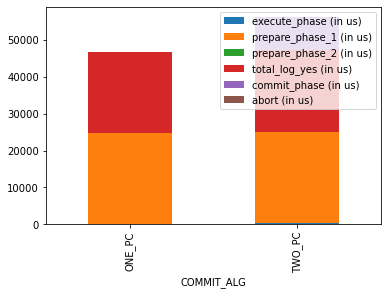

In [10]:
print(result)
result = result.drop(['NUM_SERVER_THREADS'], axis=1)
latency_plot = result.plot.bar(stacked='True', x='COMMIT_ALG')
fig = latency_plot.get_figure()
fig.savefig("latency_zipf09_std.png")